In [12]:
import matplotlib.pyplot as plt
import wntr
import wntr.network.controls as controls
import sqlite3
import csv
import time
import pandas as pd
import statistics

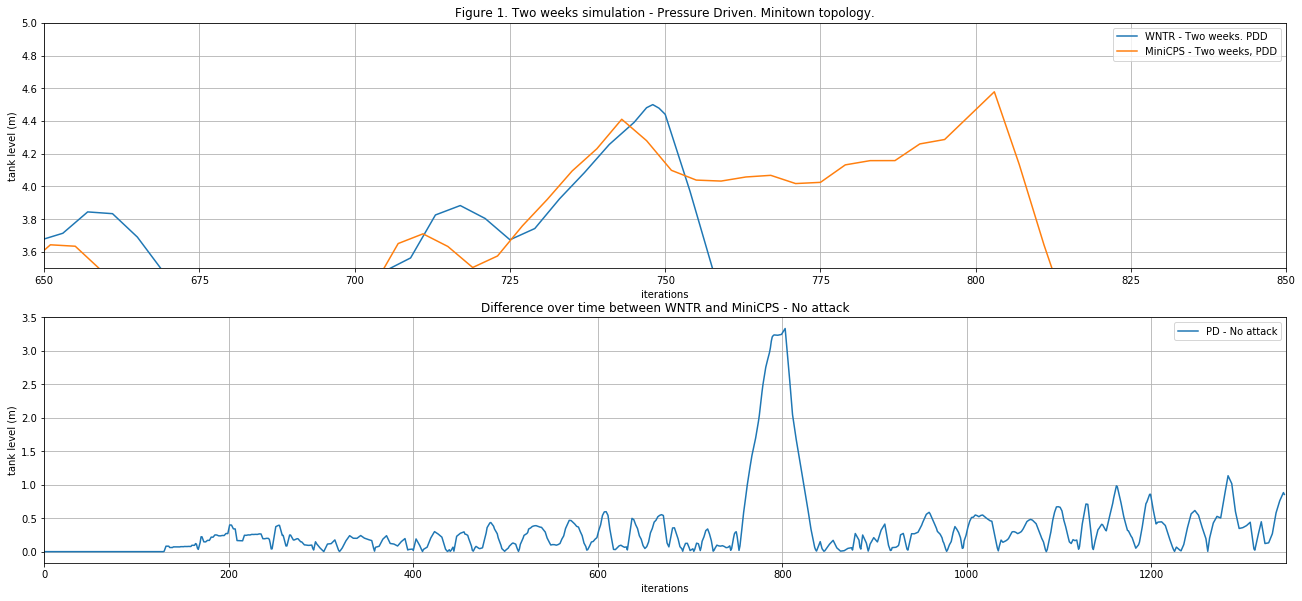

In [14]:
two_weeks_pressure_driven_diff_minicps_wntr_no_attack = []
two_weeks_no_minicps_data = pd.read_csv('two_weeks_no_minicps_pdd.csv')
two_weeks_pressure_driven_no_attack = pd.read_csv('experiment_data/two_weeks_results/pressure_driven/no_attack/physical_process.csv')

dd = plt.subplot(2,1,1)
two_weeks_no_minicps_data["TANK_LEVEL"].plot(label='WNTR - Two weeks. PDD', ax=dd)
two_weeks_pressure_driven_no_attack["TANK_LEVEL"].plot(label='MiniCPS - Two weeks, PDD', ax=dd)
plt.title("Figure 1. Two weeks simulation - Pressure Driven. Minitown topology.")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.xlim(left=0, right=1346)
plt.xlim(left=650, right=850)
plt.ylim(bottom=3.5, top=5)
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

for i in range((len(two_weeks_pressure_driven_no_attack['TANK_LEVEL']))):
    two_weeks_pressure_driven_diff_minicps_wntr_no_attack.append(abs ( two_weeks_no_minicps_data['TANK_LEVEL'][i] - two_weeks_pressure_driven_no_attack['TANK_LEVEL'][i]  ) )
    
dd = plt.subplot(2,1,2)
plt.plot(two_weeks_pressure_driven_diff_minicps_wntr_no_attack, label="PD - No attack")
plt.title("Difference over time between WNTR and MiniCPS - No attack")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.xlim(left=0, right=1346)
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

The figures above show the difference between WNTR and Minicps with a two week simulation. There is a peak in the behavior difference around iteration 800. Focusing the upper subplot between iterations 650 and 850 and 3.5m and 5.0m we can generate valuable information to explain the difference in the behavior. In the WNTR simulation, the tank level reaches 4.5, causing the pump2 to be closed and dropping the water tank level. In the MiniCPS simulation, this never happens and the pump2 remains open. (the tank level is lowered because the demand is increased)

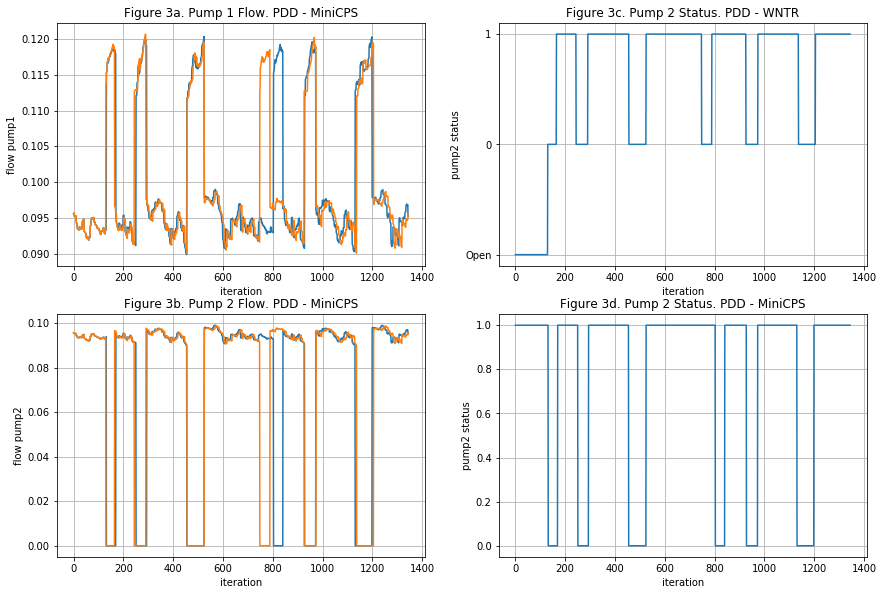

In [15]:
fp1 = two_weeks_pressure_driven_no_attack['FLOW_PUMP1']
fp2 = two_weeks_pressure_driven_no_attack['FLOW_PUMP2']
sp1 = two_weeks_pressure_driven_no_attack['STATUS_PUMP1']
sp2 = two_weeks_pressure_driven_no_attack['STATUS_PUMP2']

wntr_fp1 = two_weeks_no_minicps_data['FLOW_PUMP1']
wntr_fp2 = two_weeks_no_minicps_data['FLOW_PUMP2']
wntr_sp1 = two_weeks_no_minicps_data['STATUS_PUMP1']
wntr_sp2 = two_weeks_no_minicps_data['STATUS_PUMP2']


plt.subplot(421)
plt.plot(fp1)
plt.plot(wntr_fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Figure 3a. Pump 1 Flow. PDD - MiniCPS')
plt.grid(True)

plt.subplot(423)
plt.plot(fp2)
plt.plot(wntr_fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Figure 3b. Pump 2 Flow. PDD - MiniCPS')
plt.grid(True)

plt.subplot(422)
plt.plot(wntr_sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Figure 3c. Pump 2 Status. PDD - WNTR')
plt.grid(True)


plt.subplot(424)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Figure 3d. Pump 2 Status. PDD - MiniCPS')
plt.grid(True)

plt.subplots_adjust(top=4.00, right=2.00)
plt.show()